# Homework 1A 

In [2]:
import numpy
import random
import scipy.stats
import matplotlib.mlab   as mlab
import matplotlib.pyplot as plt
from scipy       import mean
from scipy       import stats
from scipy.stats import sem,t
from scipy.stats import norm

In [3]:
def singStep(n,ds,ps,pf):
    # n  : number of the trials
    # ds : step length
    # ps : chance of stepping
    # pf : chance of falling off 
    distance = []   
    for i in range(1,n+1):    
        dist  = 0.0
        bnd = 1   
        while bnd:      
            p1 = random.random() 
            p2 = random.random()        
            if p1 < ps:   
                if p2 < pf:  #if the things fall off, break  
                    break                        
                dist += ds
        distance.append(dist)    
    return distance

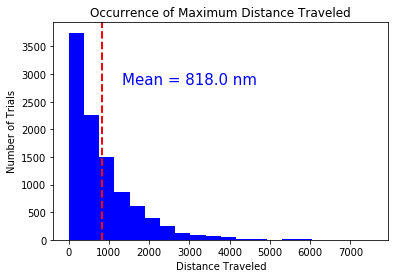

In [40]:
n  = 10000   
ds = 8.0     
ps = 0.01     
pf = 0.00976     
maxDist = singStep(n,ds,ps,pf)
histDist = plt.hist(maxDist,bins = 20, color = 'b')
mean_dist  =  numpy.mean(maxDist)
plt.title('Occurrence of Maximum Distance Traveled')
plt.axvline(x=mean_dist,color ='r',linewidth=2, linestyle='dashed')
plt.text(mean_dist + 500., histDist[0].max()*0.75, 'Mean = '+ str(round(mean_dist)) + ' nm', fontsize=15, color = 'b') 
plt.xlabel('Distance Traveled')
plt.ylabel('Number of Trials')
plt.show()

# Homework 1B

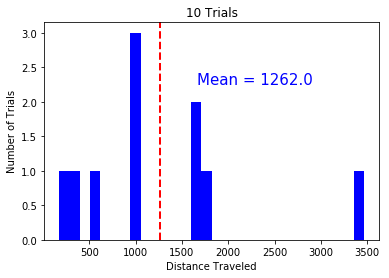

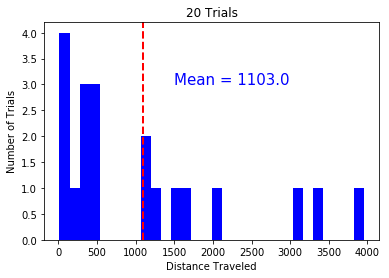

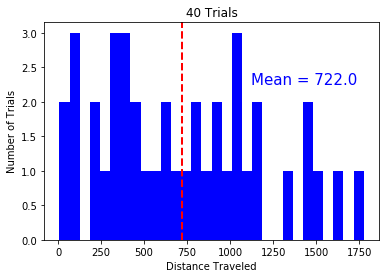

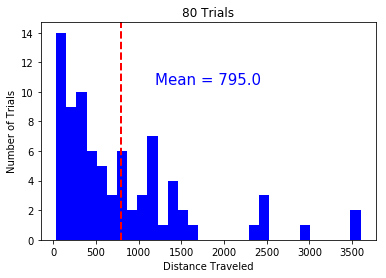

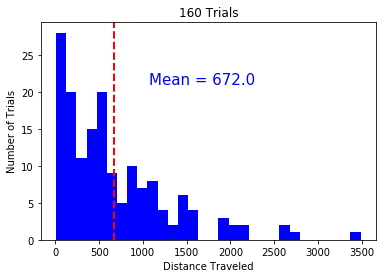

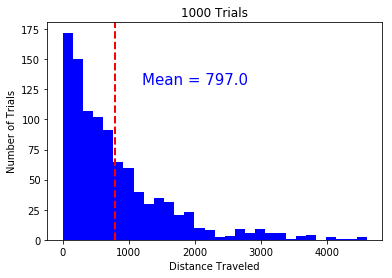

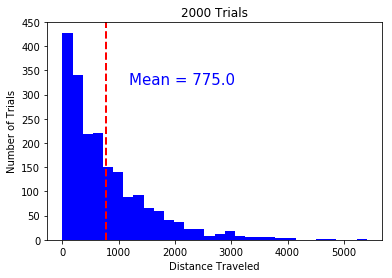

In [43]:
ds = 8.0     # step length
ps = .01     # chance of stepping forward
pf = 0.00976   # chance of falling off

trial_list = [10,20,40,80,160,1000,2000]

for n in trial_list:
    
    max_dist_data  =  numpy.array(singStep(n,ds,ps,pf))
    mean_dist      =  numpy.mean(max_dist_data)
    histDist      =  plt.hist(max_dist_data , bins=30 , color = 'b')
    
    plt.axvline(x=mean_dist,color ='r',linewidth=2, linestyle='dashed')
    plt.text(mean_dist + 400., histDist[0].max()*0.75, 'Mean = '+ str(round(mean_dist)), fontsize=15, color = 'b')
    plt.title(str(n) + ' Trials')
    plt.xlabel('Distance Traveled')
    plt.ylabel('Number of Trials')
    plt.show()

# Homework 1C

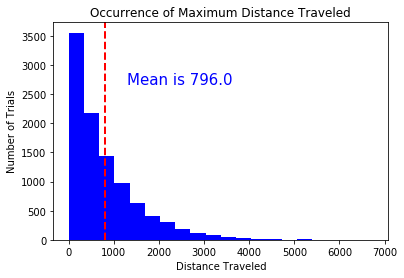

In [46]:
    ds = 8.0     # step length
    ps = .01     # chance of stepping forward
    pf = 0.00976   # chance of falling off
    n              =  10000
    max_dist_data  =  numpy.array(singStep(n,ds,ps,pf))
    mean_dist      =  numpy.mean(max_dist_data)
    histDist      =  plt.hist(max_dist_data , bins=20 , color = 'b')
    
    plt.axvline(x=mean_dist,color ='r',linewidth=2, linestyle='dashed')
    plt.text(mean_dist + 500., histDist[0].max()*0.75, 'Mean is '+ str(round(mean_dist)), fontsize=15, color = 'b')
    plt.title('Occurrence of Maximum Distance Traveled')
    plt.xlabel('Distance Traveled')
    plt.ylabel('Number of Trials')
    plt.show()

In [54]:
def confidence_interval95(t,max_dist_data):
    ddofv          =  len(max_dist_data)-1
    mean_dist      =  numpy.mean(max_dist_data)
    half_conf      =  t * stats.sem(max_dist_data,ddof=ddofv)/(ddofv+1)**(1/2)
    
    return mean_dist , half_conf

In [55]:
def confidence_interval(confidence, max_dist_data):
    
    n = len(max_dist_data)
    m = mean(max_dist_data)
    std_err = sem(max_dist_data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    
    return m,h

In [56]:
def check_conf_interval(mean_list,half_conf_list,repeat_time,target_mean=800):
    
    right_number = 0
    
    for i in range(0,repeat_time):
        
        mean_d = mean_list[i]
        h      = half_conf_list[i]
        
        if mean_d-h <= target_mean <= mean_d+h :
            
            right_number += 1
    
    propot = right_number/repeat_time
    return propot

In [57]:
def check_conf_prot(propot,max_dist_data):
    
    h = 1.96* ((propot*(1-propot))/len(max_dist_data))**(.05)
    
    if propot-h <= 0.95 <= propot + h:
        
        return 'Yes, 95% CI includes 0.95. '
    else:
        
        return 'No. 95% CI does not include 0.95. '

In [ ]:
trial_list = [10,20,40,80,160,1000,2000]
t_list         = [2.262,2.093,2.023,1.99,1.975,1.962,1.961]
repeat_time    = 200
trial_number   =  numpy.array(range(1,repeat_time+1))
propotion_list = []

ds = 8.0     # step length
ps = .01     # chance of stepping forward
pf = 0.00976    # chance of falling off
j  = -1

for n in trial_list:
    
    j             += 1
    mean_list      = []
    half_conf_list = []
    
    for i in range(1,repeat_time+1):
        
        
        max_dist_data         =   numpy.array(singStep(n,ds,ps,pf))
        # mean_dist , half_conf =   confidence_interval(0.95,max_dist_data)
        mean_dist , half_conf = confidence_interval95(t_list[j],max_dist_data)
        mean_list.append(mean_dist)
        half_conf_list.append(half_conf)
        
   
    propot  =  check_conf_interval(mean_list,half_conf_list,repeat_time,target_mean=800)
    propotion_list.append(propot)
    inside  =  check_conf_prot(propot,max_dist_data)
    
    plt.errorbar(mean_list,trial_number,xerr=half_conf_list,yerr=0, capthick=2, linestyle='')
    plt.axvline(x=800., color='r', linewidth=2, linestyle='dashed')
    plt.title(inside + ' Sample Size %d, Proportion: %.2f'% (n, propot))
    plt.xlabel('95% Confidence Interval')
    plt.ylabel('Sample')
    plt.show()

# Red, dashed line denotes where mean = 800 nm is located. We can determine if each calculated CI for each sample contains the mean but observing the plots above. Most calculated CI's capture the mean.

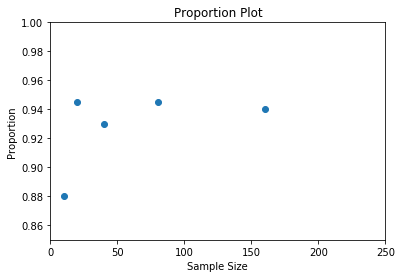

In [60]:
plt.plot(numpy.array(trial_list),numpy.array(propotion_list),'o')
plt.title('Proportion Plot')
plt.xlabel('Sample Size')
plt.ylabel('Proportion')
plt.xlim(0,250)
plt.ylim(0.85,1)
plt.show()

# The proportion gets close to 0.95 when the sample size is 20 timesteps.

# In order to obtain a distribution that has converged to a solid shape, the sample size must be large. Otherwise, the distributions may be choppy, and no clear conclusion can be drawn from them. 

# Homework 2

In [1]:
def single_motor_time_window(n,dt,ds,ps,pf,window):

    # n  : the number of the trials
    # dt : time length
    # ds : step length
    # ps : chance of stepping forward
    # pf : chance of falling off
    
    times_a_window = window/dt
    flag          = 0.0
    speed_list    = []
    
    distance = []
    
    for i in range(1,n+1):
        
        t          = 0.0
        dist       = 0.0
        last_point = 0.0
        bnd      = 1
        
        while bnd:
            
            p1 = random.random() # random number from (0,1)
            p2 = random.random() # random number from (0,1)
            
            if p1 < ps:
                
                if p2 < pf:
                    
                    break
                    
                else:
                    
                    dist += ds
                    
            flag += 1
                
            if flag == times_a_window:
                    
                new_velocity = (dist-last_point)/window
                last_point   = dist
                flag         = 0.0
                speed_list.append(new_velocity)
                    
        distance.append(dist)
        
    return speed_list

In [2]:
flag

NameError: name 'flag' is not defined

# Homework 2  Q1

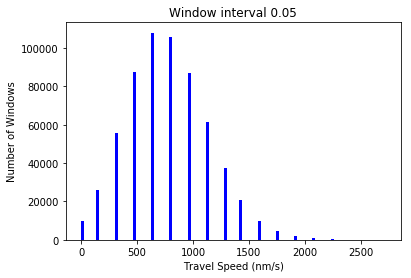

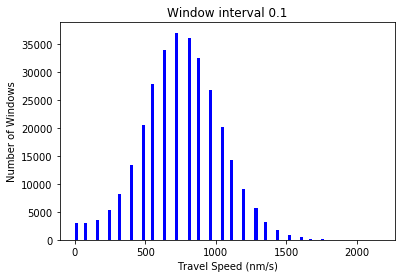

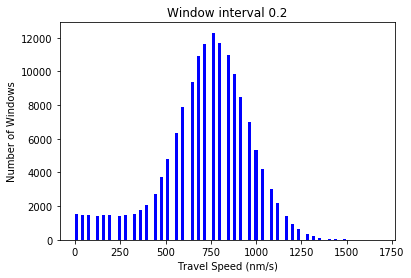

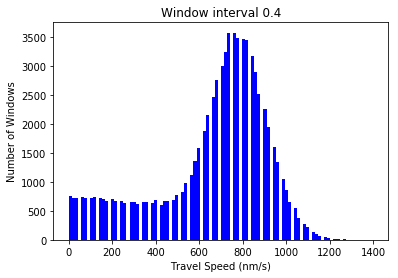

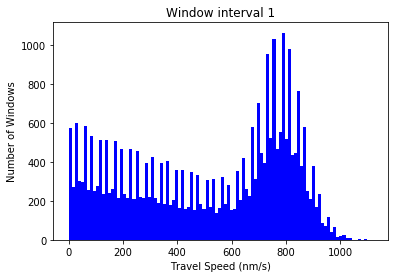

In [78]:
dt = 0.0001  # time length
ds = 8.0     # step length
ps = .01     # chance of stepping forward
pf = 0.00976     # chance of falling off

window_list = [0.05,0.1,0.2,0.4,1]
n      = 30000 

for window in window_list:
    speed_list     =  numpy.array(single_motor_time_window(n,dt,ds,ps,pf,window))
    histDist      =  plt.hist(speed_list , bins=100 , color = 'b')
    # mean     = numpy.mean(speed_list)
    # variance = numpy.var(speed_list)
    # sigma    = numpy.sqrt(variance)
    # x        = numpy.linspace(min(speed_list), max(speed_list), 100)
    # plt.plot(x, mlab.normpdf(x, mean, sigma))
    plt.title('Window interval ' + str(window))
    plt.xlabel('Travel Speed (nm/s)')
    plt.ylabel('Number of Windows')
    plt.show()


# Homework 2 A) Q2

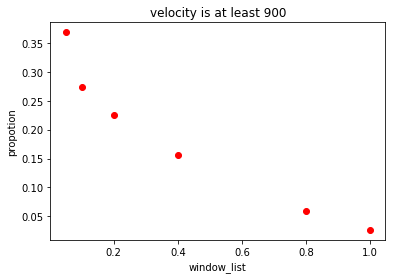

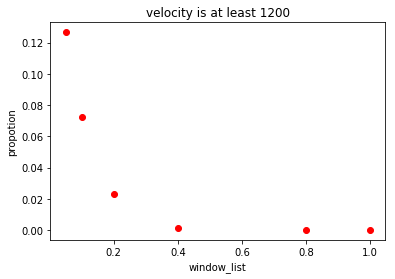

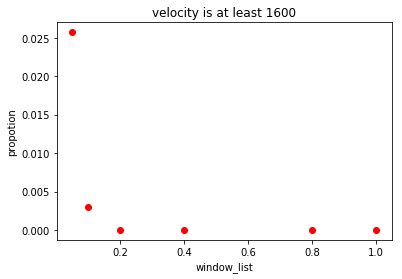

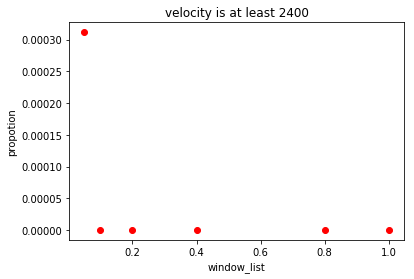

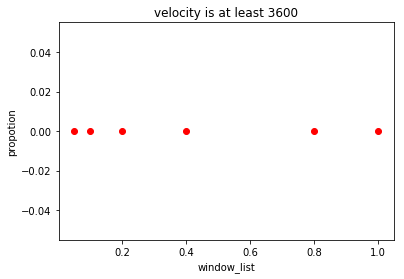

In [11]:
n  = 300     # the number of the trials
dt = 0.0001  # time length
ds = 8.0     # step length
ps = .01     # chance of stepping forward
pf = .01     # chance of falling off

window_list = [0.05,0.1,0.2,0.4,0.8,1]
veloci_list = [900,1200,1600,2400,3600]

for velocity in veloci_list:
 
    propti_list    =   []
    
    for window in window_list:
        
        speed_list     =   numpy.array(single_motor_time_window(n,dt,ds,ps,pf,window))
        target_list    =   [i for i in speed_list if i>= velocity]
        new_propti     =   len(target_list)/len(speed_list)
        propti_list.append(new_propti)
        
    plt.plot(numpy.array(window_list),numpy.array(propti_list),'ro')
    plt.title('velocity is at least ' + str(velocity))
    plt.xlabel('window_list')
    plt.ylabel('propotion')
    plt.show()

# Homework 3)

In [12]:
def duo_motor_step_alpha(n,ds,ps,pf,po):

    # n  : the number of the trials
    # ds : step length
    # ps : chance of stepping forward
    # pf : chance of falling off
    # po : chance of on
    
    distance = []
    
    for i in range(1,n+1):
        
        dist1  =  0.0
        dist2  =  0.0
        Flag1  =  1
        Flag2  =  1
        
        while Flag1 or Flag2:
                     
                if Flag1 == 1 and Flag2 == 1:
                    
                    p1 = random.random() # random number from (0,1)
                    p2 = random.random() # random number from (0,1)
                    p3 = random.random() # random number from (0,1)
                    p4 = random.random() # random number from (0,1)
                    
                    if p1 < ps and p3 > ps:
                
                        if p2 < pf:
                    
                            Flag1 = 0 
                            
                        else: 
                            dist1 += ds
                            
                    if p3 < ps and p1 > ps:
                
                        if p4 < pf:
                    
                            Flag2 = 0 
                            
                        else: 
                            dist2 += ds      
                    

                    if p1 < ps and p3 < ps:
                        
                        if p2 < pf and p4 > pf:
                    
                            Flag1 = 0 
                            
                        else: 
                            dist2 += ds
                        
                        if p4 < pf and p2 > pf:
                    
                            Flag2 = 0 
                            
                        else: 
                            
                            dist1 += ds 
                            
                        if p2 < pf and p4 < pf:
                            
                            Flag1 = 0
                            Flag2 = 0
                            distance.append(max(dist1,dist2))
                            
                        if p2 > pf and p4 > pf:
                            
                            dist1 += ds
                            dist2 += ds
                            
                if Flag1 == 1 and Flag2 == 0:
                    
                    p1 = random.random() # random number from (0,1)
                    p2 = random.random() # random number from (0,1)
                    p3 = random.random() # random number from (0,1)
                    
                    if p1 < ps:
                        
                        if p2 < pf:
                            
                            Flag1 = 0
                            distance.append(dist1)
                            
                        else:
                            
                            dist1 += ds
                            
                    if p3 < po:
                        
                        Flag2 = 1
                        
                
                if Flag1 == 0 and Flag2 == 1:
                    
                    p1 = random.random() # random number from (0,1)
                    p2 = random.random() # random number from (0,1)
                    p3 = random.random() # random number from (0,1)
                    
                    if p1 < ps:
                        
                        if p2 < pf:
                            
                            Flag2 = 0
                            distance.append(dist2)
                            
                        else:
                            
                            dist2 += ds
                            
                    if p3 < po:
                        
                        Flag1 = 1          
                            
                    
                    
    return distance

# Check the example of Lec 3 p31 p36


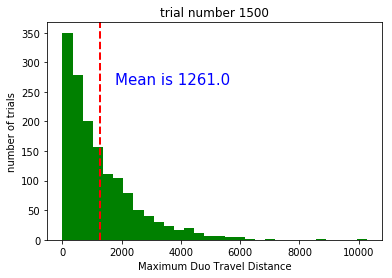

In [13]:
n  = 1500    # the number of the trials
dt = .0001   # time length
ds = 8.0     # step length
#ps = .01     # chance of stepping forward
#pf = .01     # chance of falling off
po = .0005   # chance of rebinding

ps_list = [   0.01  ]
pf_list = [  1/150  ]
    
for i in range(0,len(ps_list)):
    
    ps  = ps_list[i]
    pf  = pf_list[i]
    
    max_dist_data  =  numpy.array(singStep(n,ds,ps,pf))
    mean_dist      =  numpy.mean(max_dist_data)
    histDist      =  plt.hist(max_dist_data , bins=30 , color = 'g')

    plt.axvline(x=mean_dist,color ='r',linewidth=2, linestyle='dashed')
    plt.text(mean_dist + 500., histDist[0].max()*0.75, 'Mean is '+ str(round(mean_dist)), fontsize=15, color = 'b')
    plt.title('trial number ' + str(n))
    plt.xlabel('Maximum Duo Travel Distance')
    plt.ylabel('number of trials')
    plt.show()

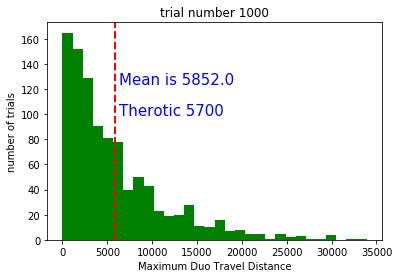

In [15]:
n  = 1000    # the number of the trials
dt = .0001   # time length
ds = 8.0     # step length
#ps = .01     # chance of stepping forward
#pf = .01     # chance of falling off
po = .0005   # chance of rebinding


d  =  1200
pi =  5
v  =  800
Theortic_sol =  d*(1+pi*d/2/v)


ps_list = [   0.01  ]
pf_list = [  1/150  ]
    
for i in range(0,len(ps_list)):
    
    ps  = ps_list[i]
    pf  = pf_list[i]
    
    max_dist_data  =  numpy.array(duo_motor_step_alpha(n,ds,ps,pf,po))
    mean_dist      =  numpy.mean(max_dist_data)
    histDist      =  plt.hist(max_dist_data , bins=30 , color = 'g')

    plt.axvline(x=mean_dist,color ='r',linewidth=2, linestyle='dashed')
    plt.text(mean_dist + 500., histDist[0].max()*0.75, 'Mean is '+ str(round(mean_dist)), fontsize=15, color = 'b')
    plt.text(mean_dist + 500., histDist[0].max()*0.60, 'Therotic '+ str(round(Theortic_sol)), fontsize=15, color = 'b')
    plt.title('trial number ' + str(n))
    plt.xlabel('Maximum Duo Travel Distance')
    plt.ylabel('number of trials')
    plt.show()

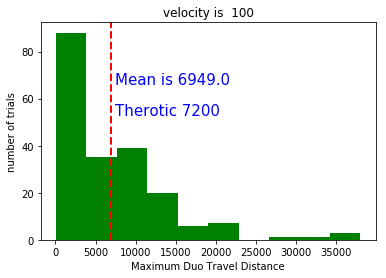

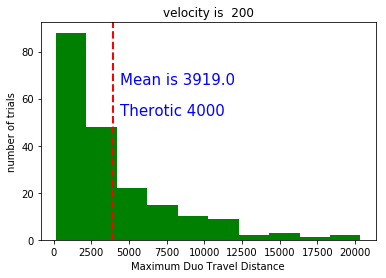

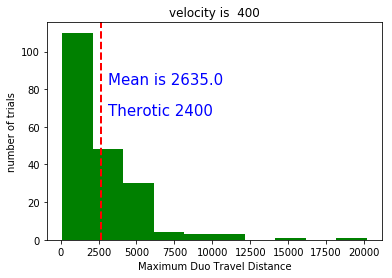

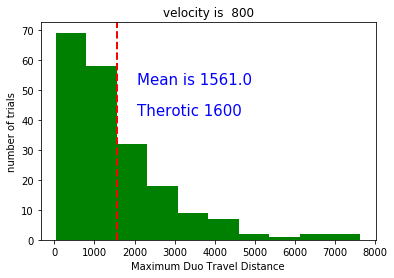

In [16]:
n  = 200      # the number of the trials
dt = .0001    # time length
ds = 8.0      # step length
#ps = .01     # chance of stepping forward
#pf = .01     # chance of falling off
po = .0002    # chance of rebinding


d  =  800
pi =  2

Theortic_sol =  d*(1+pi*d/2/v)
Theortic_sol

ps_list = [  .00125 ,  .0025  ,  .005   ,   .01]
pf_list = [  .01    ,   .01   ,  .01    ,   .01]
ve_list = [  100    ,   200   ,  400    ,   800]
    
for i in range(0,4):
    
    ps  = ps_list[i]
    pf  = pf_list[i]
    
    max_dist_data  =  numpy.array(duo_motor_step_alpha(n,ds,ps,pf,po))
    mean_dist      =  numpy.mean(max_dist_data)
    Theortic_sol   =  d*(1+pi*d/2/ve_list[i])
    histDist      =  plt.hist(max_dist_data , bins=10 , color = 'g')

    plt.axvline(x=mean_dist,color ='r',linewidth=2, linestyle='dashed')
    plt.text(mean_dist + 500., histDist[0].max()*0.75, 'Mean is '+ str(round(mean_dist)), fontsize=15, color = 'b')
    plt.text(mean_dist + 500., histDist[0].max()*0.60, 'Therotic '+ str(round(Theortic_sol)), fontsize=15, color = 'b')
    plt.title('velocity is  ' + str(ve_list[i]))
    plt.xlabel('Maximum Duo Travel Distance')
    plt.ylabel('number of trials')
    plt.show()